# **MINI-PROJECT-3: House Price Estimation**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/P3_HousePrice/P3_CodeBase"

# install import-ipynb for importing helper modules
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as gplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P3_HousePrice/P3_CodeBase
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=c3050fce091bec705b964b861eb9235828d03df17bea9ad917252bd43ec3f7bb
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from plotlib_helper.ipynb
importing Jupyter notebook from datapreprocess_helper.ipynb


In [3]:
data_path = "/content/drive/My Drive/P3_HousePrice/P3_CodeBase/data/"
dnn_path = "/content/drive/My Drive/P3_HousePrice/P3_CodeBase/dnn/"
image_path="/content/drive/My Drive/P3_HousePrice/P3_CodeBase/data/Preprocessed_Images/"

## **Data Preprocessing**

### **Textual PreProcessing**

#### **Load Textual Data**

In [4]:
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

filepath = os.path.join(data_path, "HousesInfo.txt")
df = pd.read_csv(filepath, names=['Bedrooms','Bathrooms','Area','Zipcode','Price'], delim_whitespace=True)
df

,Bedrooms,Bathrooms,Area,Zipcode,Price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


#### **Null check**

In [5]:
print(df.dtypes , df.shape)
print()
print(df.isnull().sum())

Bedrooms       int64
Bathrooms    float64
Area           int64
Zipcode        int64
Price          int64
dtype: object (535, 5)

Bedrooms     0
Bathrooms    0
Area         0
Zipcode      0
Price        0
dtype: int64


In [6]:
df.describe()

,Bedrooms,Bathrooms,Area,Zipcode,Price
count,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,3.377570,2.664953,2364.904673,90937.768224,5.893628e+05
std,1.160952,0.995077,1224.556982,7141.857452,5.090261e+05
min,1.000000,1.000000,701.000000,36372.000000,2.200000e+04
25%,3.000000,2.000000,1440.000000,92276.000000,2.492000e+05
50%,3.000000,2.500000,2078.000000,92880.000000,5.290000e+05
75%,4.000000,3.000000,3067.500000,93510.000000,7.285000e+05
max,10.000000,7.000000,9583.000000,98021.000000,5.858000e+06


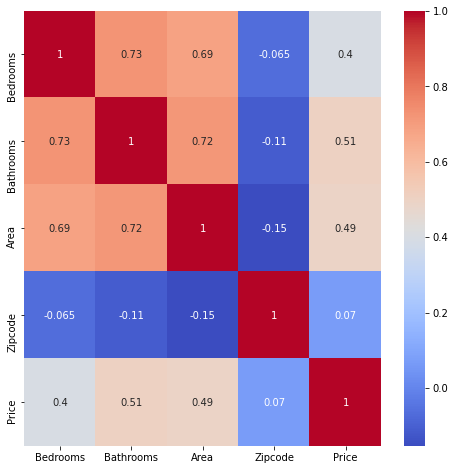

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

#### **Encoding and Normalization**

In [9]:
for col in ['Bedrooms','Bathrooms','Zipcode']:
  dataprep.encode_text_dummy(df, col)

dataprep.encode_numeric_range(df,'Area')

df.insert(0, 'House#', range(1, len(df)+1))
df

,House#,Area,Price,Bedrooms-1,Bedrooms-2,Bedrooms-3,Bedrooms-4,Bedrooms-5,Bedrooms-6,Bedrooms-7,Bedrooms-8,Bedrooms-10,Bathrooms-1.0,Bathrooms-1.5,Bathrooms-2.0,Bathrooms-2.5,Bathrooms-3.0,Bathrooms-3.25,Bathrooms-3.5,Bathrooms-4.0,Bathrooms-4.5,Bathrooms-5.0,Bathrooms-5.5,Bathrooms-6.0,Bathrooms-6.5,Bathrooms-7.0,Zipcode-36372,Zipcode-60002,Zipcode-60016,Zipcode-60046,Zipcode-62025,Zipcode-62034,Zipcode-62088,Zipcode-62214,Zipcode-62234,Zipcode-62249,Zipcode-81418,Zipcode-81521,Zipcode-81524,Zipcode-85255,Zipcode-85262,Zipcode-85266,Zipcode-85331,Zipcode-85377,Zipcode-90038,Zipcode-90211,Zipcode-90265,Zipcode-90803,Zipcode-91752,Zipcode-91901,Zipcode-91915,Zipcode-92021,Zipcode-92040,Zipcode-92253,Zipcode-92276,Zipcode-92543,Zipcode-92677,Zipcode-92692,Zipcode-92802,Zipcode-92880,Zipcode-93105,Zipcode-93111,Zipcode-93314,Zipcode-93446,Zipcode-93510,Zipcode-93720,Zipcode-93924,Zipcode-94501,Zipcode-94531,Zipcode-94565,Zipcode-94568,Zipcode-95008,Zipcode-95220,Zipcode-96019,Zipcode-98021
0,1,-0.245215,869500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,-0.405089,865200,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,-0.274488,889000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,-0.252195,910000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,-0.231029,971226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,531,-0.692637,399900,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
531,532,0.989417,460000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
532,533,-0.704346,407000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
533,534,-0.637244,419000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### **Removing Outliers**

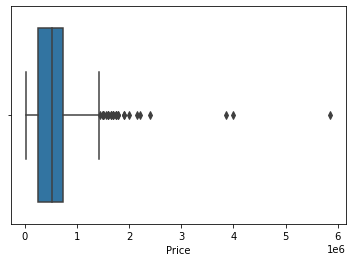

In [10]:
sns.boxplot(x= df['Price'])

In [11]:
df_filtered = df.query('100000 < Price < 900000')
print(f"Shape of data frame after data preprocessing and removing outliers: {df_filtered.shape}")

Shape of data frame after data preprocessing and removing outliers: (405, 75)


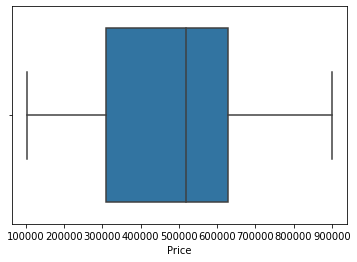

In [12]:
sns.boxplot(x= df_filtered['Price'])

### **Image Preprocessing**

In [13]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

import csv
import numpy as np
%matplotlib inline

import cv2
import glob
from IPython.display import Image

#### **Combining all image urls into an array**

In [14]:
img = []
frontal_images, bedroom_images, bathroom_images, kitchen_images = [], [], [], []
for number in range(1, 536):
  for imgtype in ["_frontal.jpg", "_bedroom.jpg", "_bathroom.jpg", "_kitchen.jpg"]:
    for path in glob.glob("/content/drive/My Drive/P3_HousePrice/P3_CodeBase/data/img/" + str(number) + imgtype):
      if os.path.isfile(path):
        if imgtype == "_frontal.jpg":
          frontal_images.append(path)
        elif imgtype == "_bedroom.jpg":
          bedroom_images.append(path)
        elif imgtype == "_bathroom.jpg":
          bathroom_images.append(path)
        elif imgtype == "_kitchen.jpg":
          kitchen_images.append(path)
        else:
          None

img = pd.DataFrame(img , columns=['frontal_img','bedroom_img', 'bathroom_img', 'kitchen_img'])
          
img['frontal_img'] = frontal_images
img['bedroom_img'] = bedroom_images
img['bathroom_img']= bathroom_images
img['kitchen_img'] = kitchen_images

img.insert(0, 'House#', range(1, len(img)+1))


img[0:5]

,House#,frontal_img,bedroom_img,bathroom_img,kitchen_img
0,1,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
1,2,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
2,3,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
3,4,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
4,5,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...


#### **Removing Outliers**

In [15]:
# retaining only index values that match with textual data
df_textual_indexes = set(df_filtered.index.values)
df_img_indexes = set(img.index.values)
unmatched_indexes = list(df_img_indexes - df_textual_indexes)
img.drop(unmatched_indexes, inplace=True)

img

,House#,frontal_img,bedroom_img,bathroom_img,kitchen_img
0,1,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
1,2,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
2,3,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
6,7,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
10,11,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
...,...,...,...,...,...
530,531,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
531,532,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
532,533,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...
533,534,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...,/content/drive/My Drive/P3_HousePrice/P3_CodeB...


### **Saving Preprocessed Datasets**

In [16]:
img_write = os.path.join(data_path,"P3_PreProcessed_ImageDataset.csv")
text_write = os.path.join(data_path,"P3_PreProcessed_TextDataset.csv")

img.to_csv(img_write,index=False)
df_filtered.to_csv(text_write,index=False)

print("Successfully saved preprocessed dataset")

Successfully saved preprocessed dataset


#### **Combining images**

In [17]:
images_output=[]
for row_index,row in img.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.bathroom_img)
            image1 = cv2.resize(image_temp1, (64 , 64))
            
            image_temp2 = cv2.imread(row.bedroom_img)
            image2 = cv2.resize(image_temp2, (64 , 64))
            
            image_temp3 = cv2.imread(row.frontal_img)
            image3 = cv2.resize(image_temp3, (64 , 64))
            
            image_temp4 = cv2.imread(row.kitchen_img)
            image4 = cv2.resize(image_temp4, (64 , 64))
              
            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)
            
            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]
            
        
            images_output.append(outputImage)      
            

#### **Normalizing image array**

In [18]:
images_output = np.array(images_output,dtype=float)
#images_output = images_output/255;
#images_output[0]

In [19]:
print(f"Output shape of image array: {images_output.shape}")

Output shape of image array: (405, 128, 128, 3)


In [20]:
# from matplotlib import pyplot as plt

# for i in range(2):
#  plt.figure(figsize=(8,8))
#  plt.imshow(images_output[i], interpolation='nearest')
#  plt.show()

#### **Storing combined images**

In [21]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import save_img

index = 0;
for i in img['House#']:
  img_name=str(i)+'_preprocess.jpg'
  preprocess_path = os.path.join(image_path,img_name)
  img_pil = array_to_img(images_output[index])
  save_img(preprocess_path, img_pil)
  index = index + 1

print("Successfully stored combined images")

Successfully stored combined images
